In [33]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-project-healthcare/Healthcare_dataset.xlsx


In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Load the dataset and Display the first few rows of the dataset
data = pd.read_excel('/kaggle/input/final-project-healthcare/Healthcare_dataset.xlsx')
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [36]:
data.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [37]:
print('data_shape:',data.shape)

data_shape: (3424, 69)


In [38]:
# Checking for null values, unique counts, and data types
df_summary = data.describe(include='all').transpose()

In [39]:
data.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [40]:
# Basic information about the dataset and Check for missing values
def data_info():
    data_info = pd.DataFrame(index=data.columns)
    data_info['Data_type'] = data.dtypes
    data_info['Total_value'] = data.count()
    data_info['Null_count'] = data.isnull().sum()
    data_info['Unique_count'] = data.nunique()
    pd.set_option('display.max_rows', None)
    return data_info

data_info()

,Data_type,Total_value,Null_count,Unique_count
Ptid,object,3424,0,3424
Persistency_Flag,object,3424,0,2
Gender,object,3424,0,2
Race,object,3424,0,4
Ethnicity,object,3424,0,3
Region,object,3424,0,5
Age_Bucket,object,3424,0,4
Ntm_Speciality,object,3424,0,36
Ntm_Specialist_Flag,object,3424,0,2
Ntm_Speciality_Bucket,object,3424,0,3


**Check for Missing Data**

To identify missing values, we can visualize the missing data distribution across the dataset:

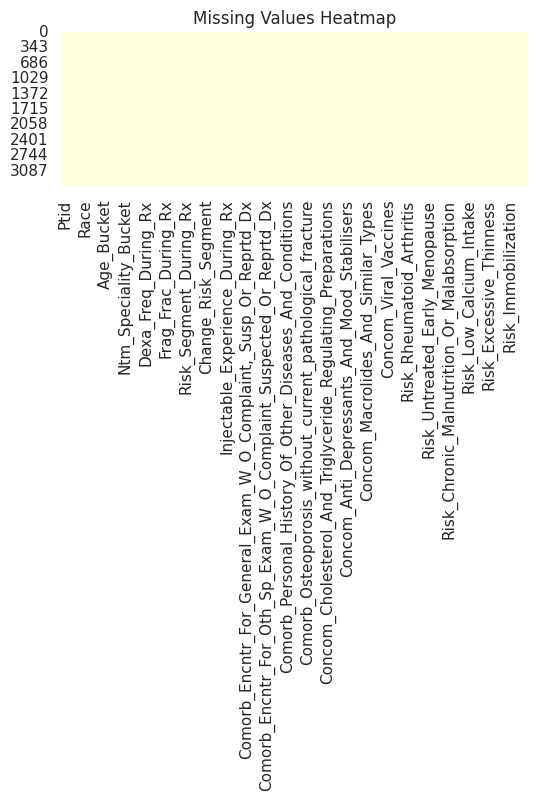

In [41]:
# Visualize missing values
plt.figure(figsize=(6, 2))
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

In [42]:
# Summary of categorical columns
print("\nCategorical Column Summary:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")


Categorical Column Summary:
Ptid: 3424 unique values
Persistency_Flag: 2 unique values
Gender: 2 unique values
Race: 4 unique values
Ethnicity: 3 unique values
Region: 5 unique values
Age_Bucket: 4 unique values
Ntm_Speciality: 36 unique values
Ntm_Specialist_Flag: 2 unique values
Ntm_Speciality_Bucket: 3 unique values
Gluco_Record_Prior_Ntm: 2 unique values
Gluco_Record_During_Rx: 2 unique values
Dexa_During_Rx: 2 unique values
Frag_Frac_Prior_Ntm: 2 unique values
Frag_Frac_During_Rx: 2 unique values
Risk_Segment_Prior_Ntm: 2 unique values
Tscore_Bucket_Prior_Ntm: 2 unique values
Risk_Segment_During_Rx: 3 unique values
Tscore_Bucket_During_Rx: 3 unique values
Change_T_Score: 4 unique values
Change_Risk_Segment: 4 unique values
Adherent_Flag: 2 unique values
Idn_Indicator: 2 unique values
Injectable_Experience_During_Rx: 2 unique values
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms: 2 unique values
Comorb_Encounter_For_Immunization: 2 unique values
Comorb_Encntr_For_General_E

In [43]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

**Visualizing Data Distributions**

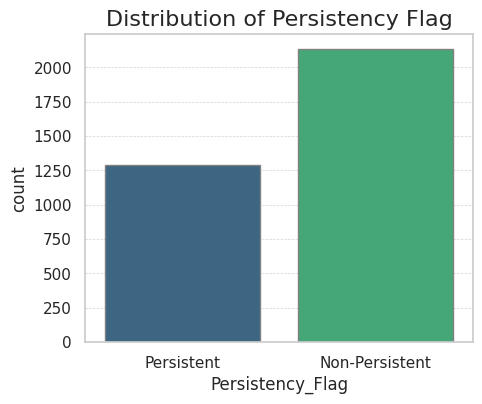

In [44]:
# Set style
sns.set(style="whitegrid")

# 1. Distribution of the target variable (Persistency_Flag)
plt.figure(figsize=(5, 4))
sns.countplot(x='Persistency_Flag', data=data, palette="viridis",edgecolor='gray')
plt.title("Distribution of Persistency Flag", fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.xticks(rotation=0)
plt.show()

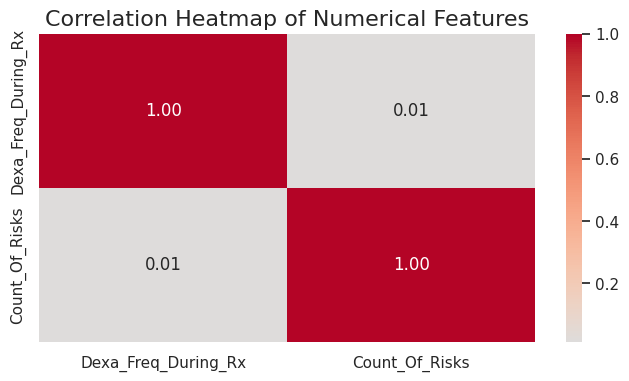

In [45]:
# 3. Correlation Heatmap for numerical features
plt.figure(figsize=(8, 4))
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

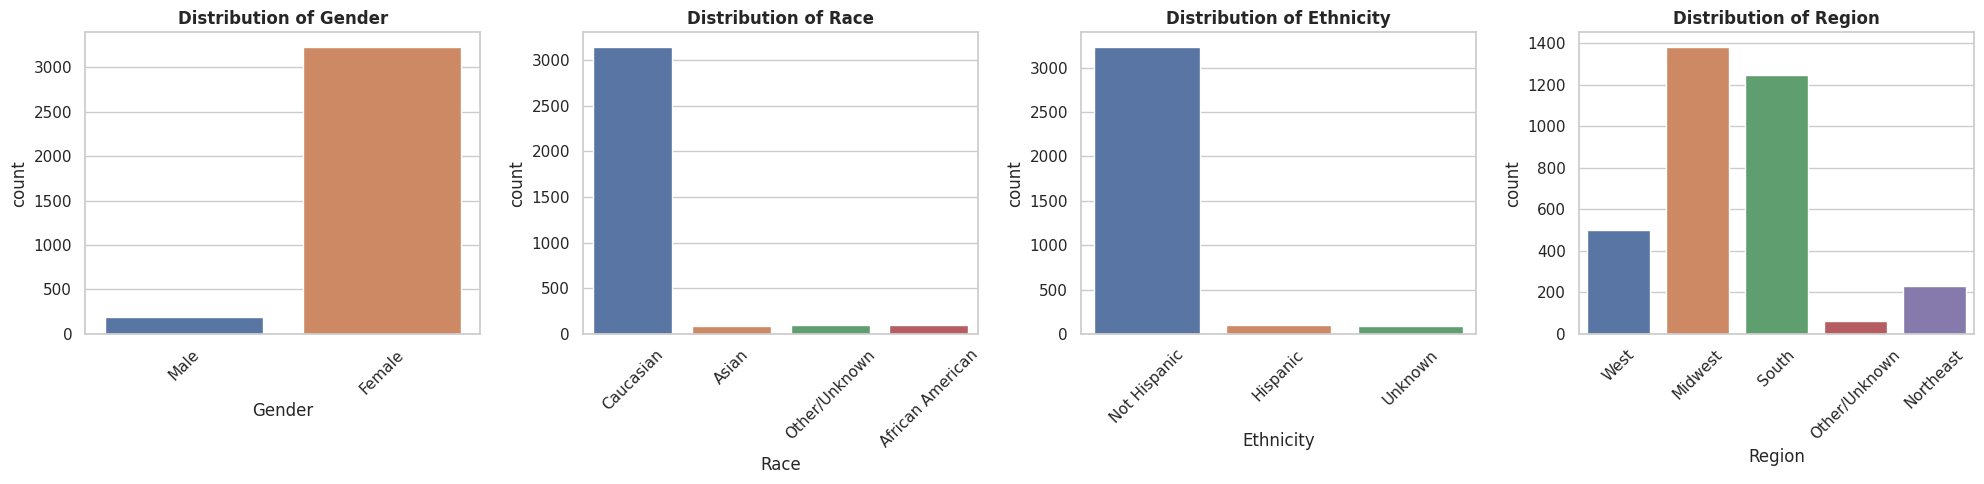

In [46]:
# Create subplots with 1 row and 4 columns for the categorical columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of categorical columns to plot
categorical_columns = ['Gender', 'Race', 'Ethnicity', 'Region']

# Loop through the columns and plot on each subplot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}',fontsize=12, y=1, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


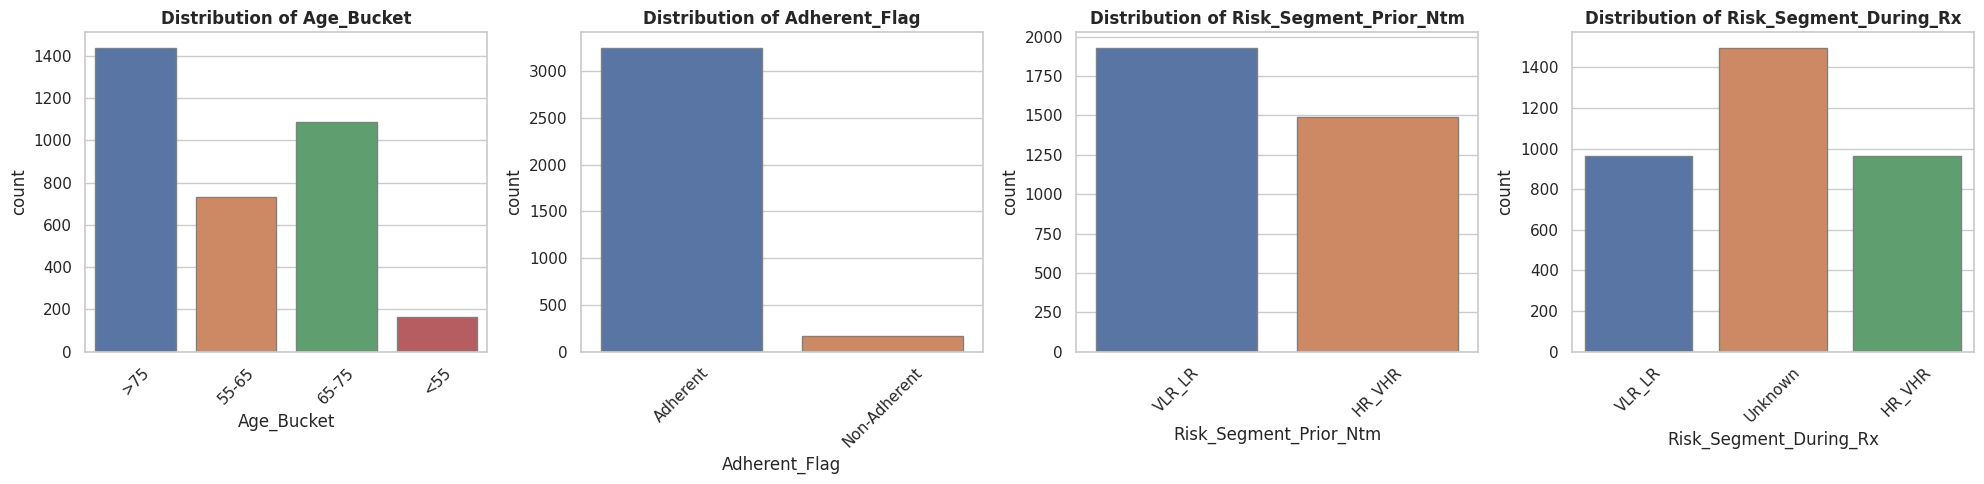

In [47]:
# Create subplots with 1 row and 4 columns for the categorical columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of categorical columns to plot
categorical_columns = ['Age_Bucket', 'Adherent_Flag', 'Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx']

for i, col in enumerate(categorical_columns):
    sns.countplot(x=data[col], ax=axes[i], edgecolor='gray')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, y=1, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout() 
plt.show()

**Barplots to Show the Relationship Between Categorical Columns and Target Variable:**

check how the categorical features relate to the target variable (Persistency_Flag). This could help us understand if some categories are associated with higher or lower persistency.

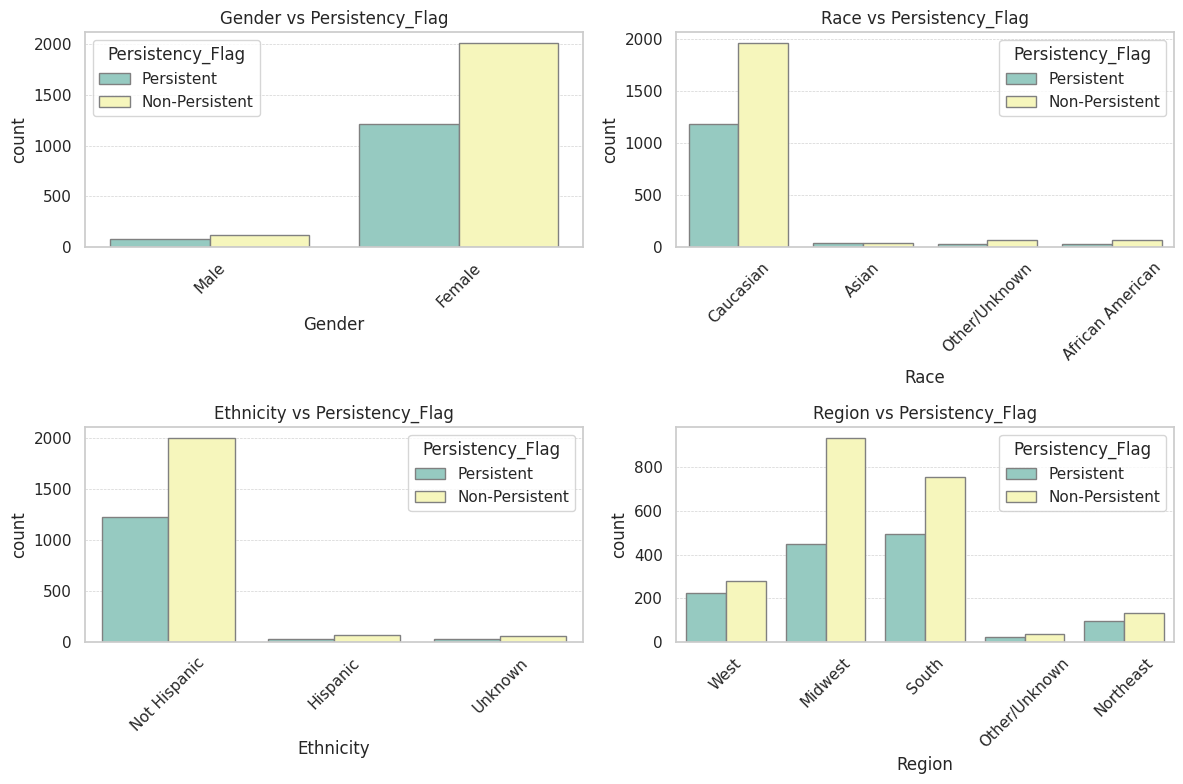

In [48]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Gender vs Persistency_Flag
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Persistency_Flag', data=data, palette="Set3",edgecolor='gray')  
plt.title('Gender vs Persistency_Flag')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')  
plt.xticks(rotation=45)  

# Race vs Persistency_Flag
plt.subplot(2, 2, 2)
sns.countplot(x='Race', hue='Persistency_Flag', data=data, palette="Set3",edgecolor='gray')  
plt.title('Race vs Persistency_Flag')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.xticks(rotation=45) 

# Ethnicity vs Persistency_Flag
plt.subplot(2, 2, 3)
sns.countplot(x='Ethnicity', hue='Persistency_Flag', data=data, palette="Set3",edgecolor='gray')  
plt.title('Ethnicity vs Persistency_Flag')
plt.xticks(rotation=45) 
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')

# Region vs Persistency_Flag
plt.subplot(2, 2, 4)
sns.countplot(x='Region', hue='Persistency_Flag', data=data, palette="Set3",edgecolor='gray')  
plt.title('Region vs Persistency_Flag')
plt.xticks(rotation=45) 
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')

# Adjust the layout
plt.tight_layout()
plt.show()

**Heatmap of Categorical Features (using Cramér's V):**
we can compute the association between categorical variables using Cramér's V, which gives a measure of association between categorical variables. The heatmap will show you which categorical features are strongly related to each other.

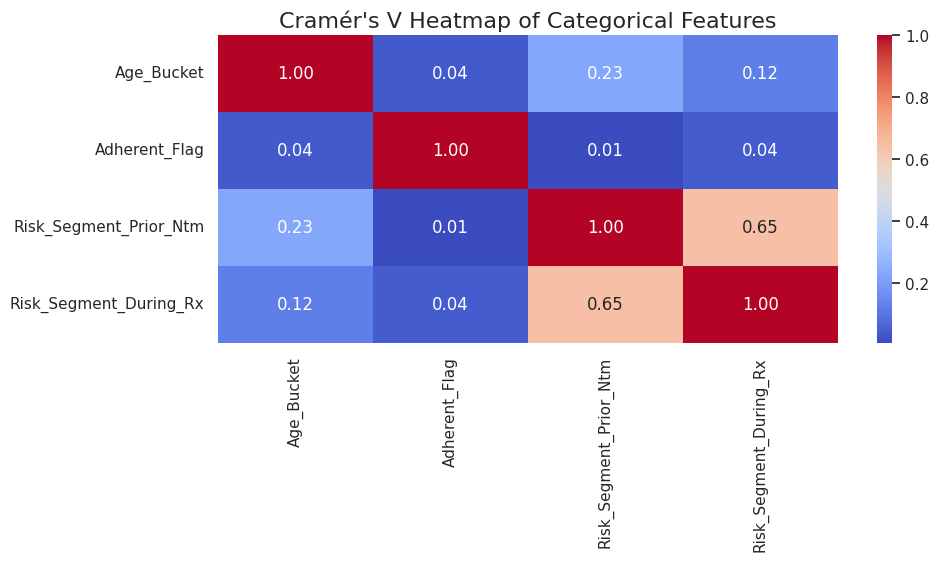

In [49]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Create an empty dataframe for Cramér's V scores
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Plot heatmap of Cramér's V
plt.figure(figsize=(10, 4))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér's V Heatmap of Categorical Features", fontsize=16)
plt.show()


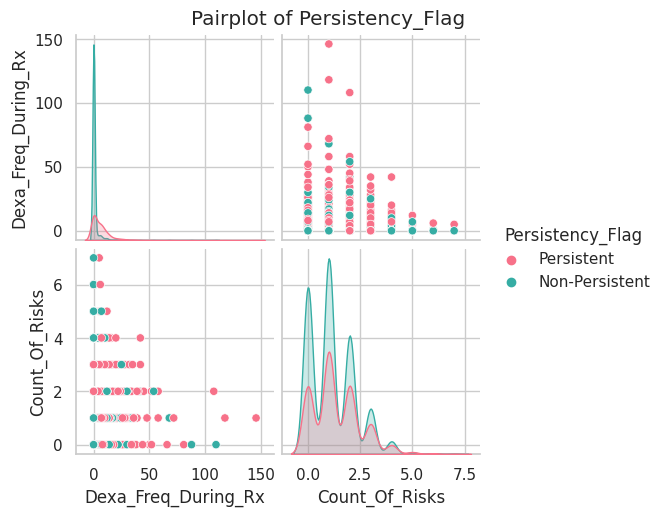

In [50]:
selected_features = ['Dexa_Freq_During_Rx', 'Count_Of_Risks',  'Persistency_Flag']
sns.pairplot(data[selected_features], hue="Persistency_Flag", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Persistency_Flag", y=1.02)  
plt.show()


 # Check for Distribution and Outliers

Plot histograms and boxplots to detect skewness and outliers.

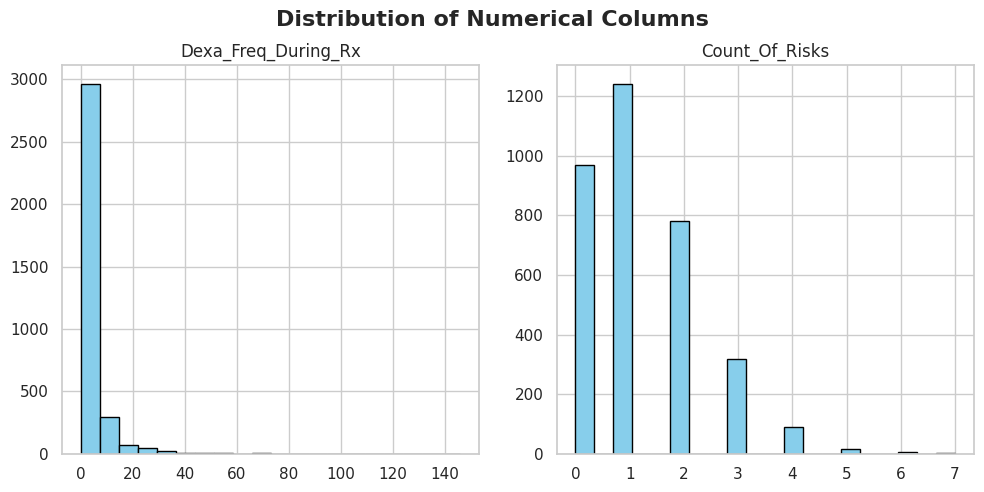

In [51]:
# Visualizing the distribution of numerical columns

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black', grid=True)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.suptitle("Distribution of Numerical Columns", fontsize=16, y=0.98, fontweight='bold')
plt.show()


#  Outlier Detection:
# 1. IQR Method

**Use IQR if:**
* The dataset is univariate or distributions are relatively normal.
* Simplicity is preferred.
* Example: "Count_Of_Risks" has only 8 outliers, which aligns with its statistical distribution (low skewness and kurtosis) IQR might work well here.

**Limitations of IQR**
* IQR assumes a normal-like distribution, which might not be suitable for skewed or multimodal data.
* Sensitive to the distribution shape; for highly skewed data, the method may misidentify normal extreme values as outliers.

In [52]:
# Detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Apply to numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Dexa_Freq_During_Rx: 460
Outliers in Count_Of_Risks: 8


# 2. Isolation Forest
**Use Isolation Forest if:**
* The dataset is multivariate or involves skewed/multimodal distributions.
* Interactions between variables are important.
* Example: "Dexa_Freq_During_Rx" shows heavy skewness and kurtosis. Isolation Forest might better handle these outliers

**How It Works**
* Isolation Forest is a machine learning algorithm designed for anomaly detection.
* It works by randomly partitioning the data Points that require fewer splits to isolate are considered outliers.
* The contamination parameter determines the expected proportion of outliers in the dataset.set.

In [53]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42) 
outlier_labels = iso.fit_predict(data[numerical_cols])

# Identify outliers
data['Outlier'] = outlier_labels
print(data['Outlier'].value_counts())

Outlier
 1    3252
-1     172
Name: count, dtype: int64


The Isolation Forest identified 172 records as outliers across all numerical columns. This is fewer than the IQR method for "Dexa_Freq_During_Rx," which flagged 460 outliers.

**Strengths of Isolation Forest**
* Handles skewed and non-Gaussian distributions well.
* Considers multidimensional interactions between variables, unlike the univariate IQR method.

In [54]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Outlier
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,1
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,1
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,2,1
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1,1


# 3. Descriptive Statistics Analysis
* Checking for unusual/incoherent values for each column. (Ex: str values in int columns).Checking for unusual/incoherent values for each column. (Ex: str values in int columns). 

In [55]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])# select all columns by the type, in this case, numeric  
categorical_columns = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])# exclude all columns by the type, in this case, numeric

In [56]:
print(numerical_columns['Dexa_Freq_During_Rx'].sort_values().unique(), end='\n\n')
print(numerical_columns['Count_Of_Risks'].sort_values().unique(), end='\n\n')

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36
  37  38  39  40  42  44  45  48  50  52  54  58  66  68  69  72  81  88
 108 110 118 146]

[0 1 2 3 4 5 6 7]



No incoherent values for the numerical variables

In [57]:
# Define the function to calculate descriptive statistics
def descriptive_numerical_columns(data, numerical_columns):
    # Create an empty list to store the result dictionaries
    result = []
    
    # Loop through each numerical column
    for col in numerical_columns:
        # Calculate the statistics for each column
        column_stats = {
            'attributes': col,
            'min': data[col].min(),
            'max': data[col].max(),
            'range': data[col].max() - data[col].min(),
            'mean': data[col].mean(),
            'median': data[col].median(),
            'std': data[col].std(),
            'skew': skew(data[col].dropna()),  # Drop NA values before calculating skew
            'kurtosis': kurtosis(data[col].dropna())  # Drop NA values before calculating kurtosis
        }
        
 # Append the result dictionary to the result list
        result.append(column_stats)
    
# Convert the result list to a DataFrame
    stats_data = pd.DataFrame(result)
    
    return stats_data

# data is your DataFrame, and 'numerical_columns' is a list of your numerical column names
numerical_columns = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']  
result = descriptive_numerical_columns(data, numerical_columns)
(result)


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Dexa_Freq_During_Rx,0,146,146,3.016063,0.0,8.136545,6.805747,74.647502
1,Count_Of_Risks,0,7,7,1.239486,1.0,1.094914,0.879405,0.897420


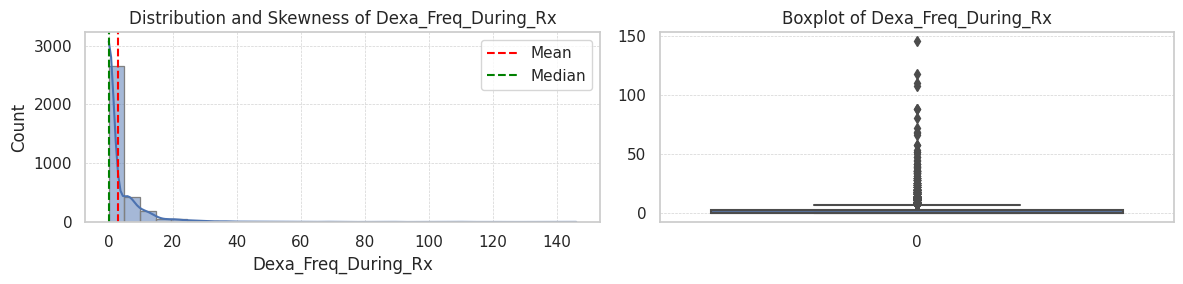

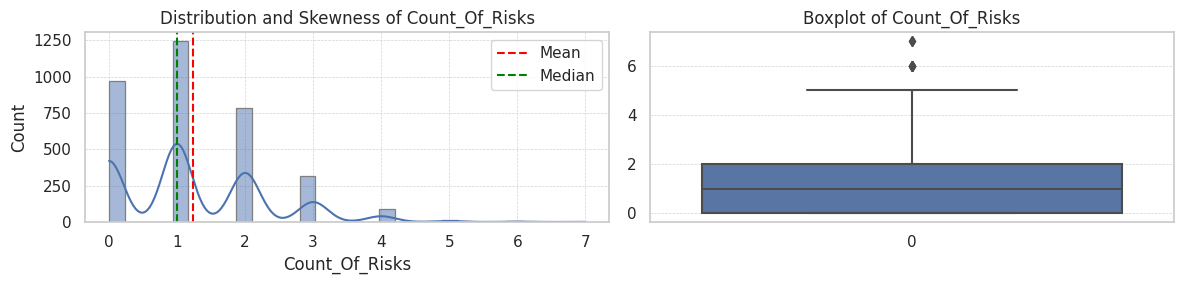

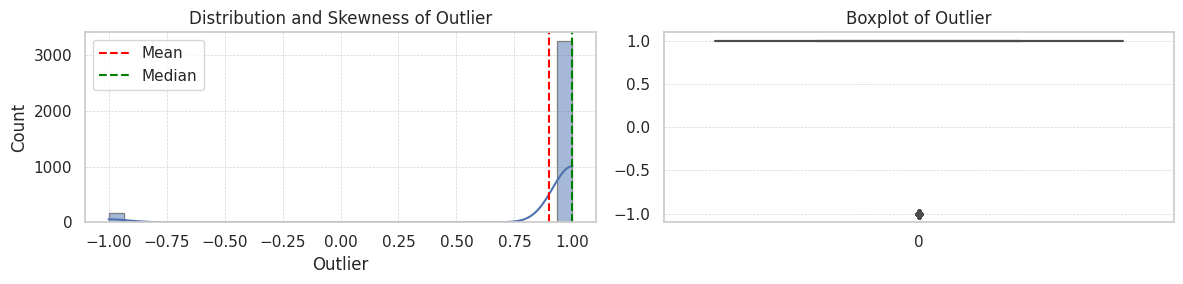

In [58]:
# Visualize numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(12, 3))

 # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30, edgecolor='gray')
    plt.axvline(data[col].mean(), color="red", linestyle="--", label="Mean")
    plt.axvline(data[col].median(), color="green", linestyle="--", label="Median")
    plt.title(f'Distribution and Skewness of {col}')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='both')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
  
    plt.tight_layout()
    plt.show()

**Outlier:**
This variable comes from a binary outlier detection process, so its distribution reflects the categorical nature (mostly inliers with a small fraction of outliers). The boxplot is not very informative because the Outlier variable lacks continuous variation.
* Since Outlier is not a continuous variable but rather binary (1 for inliers, -1 for outliers), the boxplot doesn't provide much insight.
* The whiskers extend only to 1 (majority class), while -1 (outliers) is plotted below as a single point.

# 1. Handling Outliers:
Outliers can significantly distort statistical analyses. Below are some common techniques to handle outliers:

**IQR (Interquartile Range)**: Outliers can be detected using the IQR method. Any data point that falls below Q1 - 1.5*IQR or above Q3 + 1.5*IQR is considered an outlier.

**Z-score:** This method checks how far a data point is from the mean in terms of standard deviations. Data points with a Z-score greater than 3 or less than -3 are usually considered outliers.


# 2. Handling Skewness:
**Log Transformation**: A log transformation can reduce positive skewness.

**Square Root or Cube Root Transformation:** These can also reduce skewness in the data, especially when the data has a high positive skew.

**Box-Cox Transformation:**  A statistical transformation that can be applied to make the data more normally distributed.

Outliers for Dexa_Freq_During_Rx_Log: 42
Outliers for Count_Of_Risks_Sqrt: 0
Skewness for Dexa_Freq_During_Rx_Log: 1.3300610554584147
Skewness for Count_Of_Risks_Sqrt: -0.32745539912302396


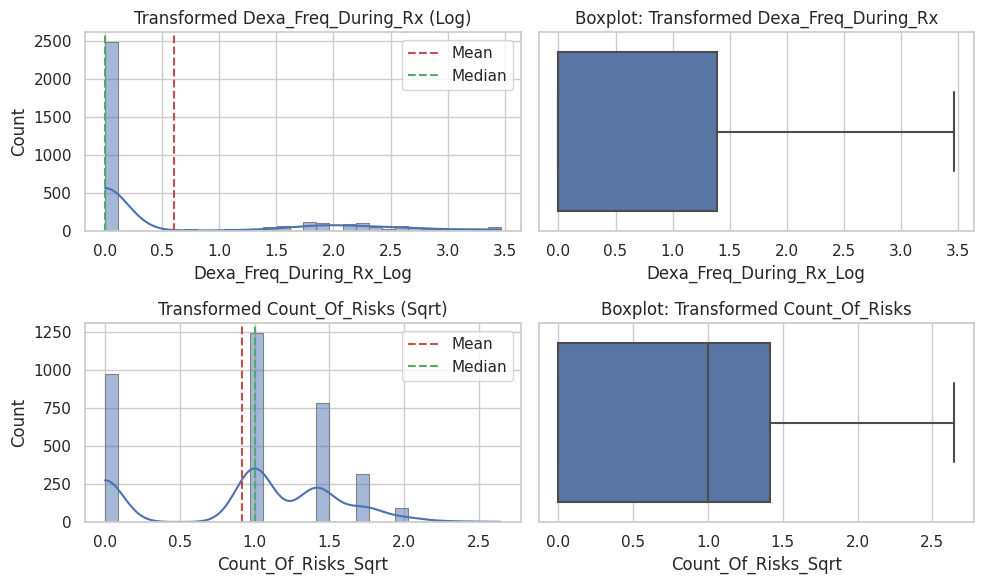

In [59]:
# Dexa_Freq_During_Rx and Count_Of_Risks

# Step 1: Analyze Skewness and Transform Data
data['Dexa_Freq_During_Rx_Log'] = np.log1p(data['Dexa_Freq_During_Rx'])
data['Count_Of_Risks_Sqrt'] = np.sqrt(data['Count_Of_Risks'])

# Step 2: Outlier Treatment using IQR
def treat_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify and count outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Outliers for {column}: {outliers.shape[0]}')
    # Capping outliers
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

data = treat_outliers(data, 'Dexa_Freq_During_Rx_Log')
data = treat_outliers(data, 'Count_Of_Risks_Sqrt')

# Step 3: Skewness Calculation
dex_skew = skew(data['Dexa_Freq_During_Rx_Log'].dropna())
count_risks_skew = skew(data['Count_Of_Risks_Sqrt'].dropna())

print(f'Skewness for Dexa_Freq_During_Rx_Log: {dex_skew}')
print(f'Skewness for Count_Of_Risks_Sqrt: {count_risks_skew}')

# Step 4: Visualization Post-Processing
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Distribution Plots
sns.histplot(data['Dexa_Freq_During_Rx_Log'], kde=True, ax=axes[0, 0], bins=30, edgecolor='gray')
axes[0, 0].set_title("Transformed Dexa_Freq_During_Rx (Log)")
# Adding mean and median lines
axes[0, 0].axvline(data['Dexa_Freq_During_Rx_Log'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 0].axvline(data['Dexa_Freq_During_Rx_Log'].median(), color='g', linestyle='--', label='Median')
axes[0, 0].legend()

sns.histplot(data['Count_Of_Risks_Sqrt'], kde=True, ax=axes[1, 0], bins=30, edgecolor='gray')
axes[1, 0].set_title("Transformed Count_Of_Risks (Sqrt)")
# Adding mean and median lines
axes[1, 0].axvline(data['Count_Of_Risks_Sqrt'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 0].axvline(data['Count_Of_Risks_Sqrt'].median(), color='g', linestyle='--', label='Median')
axes[1, 0].legend()

# Boxplots
sns.boxplot(x=data['Dexa_Freq_During_Rx_Log'], ax=axes[0, 1],orient='H')
axes[0, 1].set_title("Boxplot: Transformed Dexa_Freq_During_Rx")

sns.boxplot(x=data['Count_Of_Risks_Sqrt'], ax=axes[1, 1],orient='H')
axes[1, 1].set_title("Boxplot: Transformed Count_Of_Risks")

plt.tight_layout()
plt.show()

# 1. Outliers:

**Dexa_Freq_During_Rx_Log:** The log transformation has removed 42 outliers.

**Count_Of_Risks_Sqrt:** The square root transformation has removed 0 outliers.

The log transformation successfully reduced the impact of outliers in Dexa_Freq_During_Rx, which indicates that it was a highly skewed variable before transformation. On the other hand, Count_Of_Risks doesn't have many outliers, suggesting it was already in a reasonable range or its skewness is not severe enough to warrant significant outlier removal.

# 2. Skewness:

**Dexa_Freq_During_Rx_Log:** The skewness of this column after log transformation is 1.33, which indicates that the variable is still positively skewed but much less so than before.

**Count_Of_Risks_Sqrt:** The skewness of this column after square root transformation is -0.33, which indicates the distribution is closer to normal (negatively skewed, but much less extreme than before transformation).

**Dexa_Freq_During_Rx_Log:**

* Applying a log transformation has significantly reduced skewness and minimized the impact of outliers.
* The distribution is now closer to normal.
* The boxplot shows fewer extreme outliers, making the data more manageable for modeling.
* Skewness dropped to 1.33, which is a significant improvement compared to the original skewness of 6.81.
  
**Count_Of_Risks_Sqrt:**

* A square root transformation was applied to address mild skewness and outliers.
* The transformation has further reduced the skewness to -0.33 (near symmetric).
* The boxplot now shows no extreme outliers.

These transformations ensure that the data better aligns with assumptions of normality, reducing the likelihood of the model being overly influenced by rare extreme values.